## Remuestreo y estimación por intervalo

El **remuestreo** o **bootstrap** es una técnica computacional que se utiliza para estimar la precisión de estimadores.

### Muestrear una población

Consideremos una población para la cual queremos estimar su media, por ejemplo:

In [124]:
import numpy as np
import pandas as pd
from plotnine import *

np.random.seed(seed=6212)
## Usamos una población simulada
poblacion =  np.random.gamma(10.0, 5.0, 100000)

Tomamos una muestra aleatoria simple de esta población:

In [125]:
muestra = np.random.choice(poblacion, size = 100)
muestra.round(2)

array([ 55.84,  68.46,  52.53,  44.19,  29.17,  52.47,  47.56,  47.16,
        37.96,  65.31,  52.22,  39.6 ,  59.89,  60.52,  31.21,  32.25,
        49.08,  34.94,  68.63,  40.  ,  32.24,  36.49,  54.04,  75.09,
        82.03,  41.99,  40.14,  53.84,  24.3 ,  81.31,  38.66,  47.58,
        24.62,  61.37,  37.63,  66.64,  48.05,  51.36,  76.22,  74.49,
        42.35,  25.87,  34.82,  57.04,  22.8 ,  44.83,  47.06,  21.49,
        50.13, 105.9 ,  37.03,  63.56,  30.24,  44.2 ,  28.25,  48.47,
        34.94,  45.85,  28.5 ,  93.48,  96.56,  52.68,  38.26,  41.79,
        28.48,  49.48,  43.3 ,  40.02,  46.07,  37.68,  73.93,  36.74,
        41.  ,  47.96,  28.56,  36.75,  43.97,  59.37,  55.78,  21.53,
        45.55,  50.35,  61.77,  46.63,  77.71,  35.07,  74.28,  48.95,
        40.51,  51.67,  60.93, 104.16,  48.22, 109.  ,  54.65,  68.97,
        29.03,  30.85,  41.39,  81.01])

Y estimamos la mediana de la población usando la mediana muestral, por ejemplo:

In [126]:
mediana_estimada = np.median(muestra)
mediana_estimada.round(2)

47.11

Nuestra pregunta es: ¿cuál es el error de estimación? ¿Qué tan lejos puede caer el valor estimado del valor real poblaciónal?

### Mundo téorico

Idealmente, para ver cómo se comporta el estimador de la mediana de una muestra de tamaño 120, tomaríamos muchas muestras y veríamos cómo se comportan. No estamos seguro qué muestra particular vamos a obtener, pero si vemos esta **distribución de muestreo** podríamos evaluar qué tan probable es que caigamos cerca del valor poblacional

En este mundo teórico (no podemos tomar muchas muestras de la población), haríamos lo siguiente:

In [127]:
def obtener_estimacion(n = 200):
    muestra = np.random.choice(poblacion, size = n, replace = True)
    return np.median(muestra)
# ejemplo
obtener_estimacion()

46.5349208114575

Tomamos una gran cantidad de muestras de tamaño 200 de la población, **calculamos su mediana**, y vemos cómo se ve su distribución:

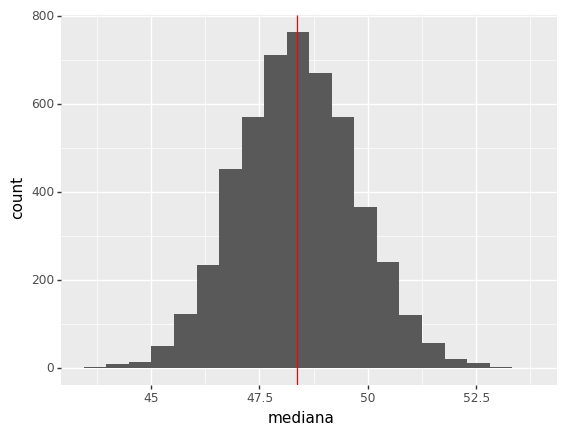

<ggplot: (-9223363277507740086)>

In [128]:
medianas_muestras = np.array([obtener_estimacion() for i in range(5000)])
datos_muestras = pd.DataFrame({'mediana':medianas_muestras})
(ggplot(datos_muestras, aes("mediana")) + geom_histogram(bins = 20) +
    geom_vline(xintercept = np.median(poblacion), color = "red"))

Y a partir de la gráfica anterior podemos juzgar qué tan lejos puede caer una **muestra particular** del verdadero
valor poblacional, que está marcado en rojo.

Por ejemplo, podemos calcular la desviación estándar de esta distribución, que en este caso se llama
el **error estándar**:

In [129]:
ee = np.std(medianas_muestra)
ee

2.4886053550215133

Y esto mide qué tan lejos puede caer el estimador de la mediana de la mediana. Con 95\% de probabilidad no cae a más de 2 errores estándar del valor poblacional (usando la aproximación normal):

In [130]:
(2*ee).round(1)

5.0

Pues la distribución de muestreo mostrada arriba es aproximadamente normal

### Mundo boostrap

En el mundo real, no podemos tomar una muestra. Lo segundo mejor (es una solución simple), es considerar a nuestra muestra como un modelo 
de nuestra población (no paramétrico).

Así que repetimos el proceso de arriba, remuestreando nuestra muestra, para entender cuánto puede variar nuestra estimación:

10000


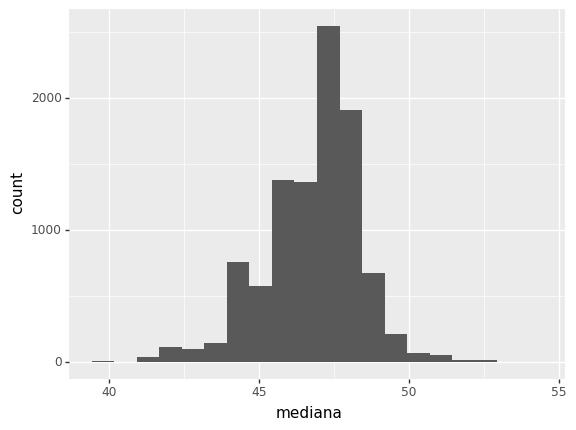

<ggplot: (-9223363277507630844)>

In [131]:
def obtener_estimacion_boot(muestra):
    muestra_boot = np.random.choice(muestra, size = len(muestra), replace = True)
    return np.median(muestra_boot)

medianas_boot = np.array([obtener_estimacion_boot(muestra) for i in range(10000)])
print(len(medianas_boot))
datos_boot = pd.DataFrame({'mediana':medianas_boot})
(ggplot(datos_boot, aes("mediana")) + geom_histogram(bins = 20))

Ahora podemos estimar el error estándar con las replicaciones bootstrap:

In [134]:
ee_boot = np.std(medianas_boot)
ee_boot

1.6220568090159462

Y nuestro intervalo del 95% es:

In [138]:
intervalo = np.array([mediana_estimada - 2*ee_boot, mediana_estimada + 2*ee_boot])
intervalo.round(2)

array([43.87, 50.35])

El verdadero valor poblacional que queríamos estimar es:

In [140]:
np.median(poblacion)

48.376198188014186

## Resumen

- El bootstrap es una técnica numérica para estimar el error estándar de muchos estimadores
- Estos intervalos se llaman **intervalos normales bootstrap**